# UEP-0239 Final Project


Most Suitable ZCTAs for Somerville to Build A New Library

## Introduction

Library is one of the most important public resources. A resaonable siting analysis is required. This report first plot different public resources in Middlesex County. Then merge them together to find the cities that can be the most suitable site for a new library.

## Import Dependencies

In [1]:
import rasterio
from rasterio.plot import show
from rasterio import features

import numpy as np

import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
%matplotlib inline 

import richdem as rd
from scipy import ndimage

import pandas as pd
from rasterstats import zonal_stats

## Read Datasets

In [2]:
import os 
os.getcwd()

'/Users/apple/Desktop/Final_Project'

In [3]:
ACS_AgeSex = pd.read_csv("./uep239-final-project-data/tabular/ACSST5Y2019.S0101/ACSST5Y2019.S0101_data_with_overlays.csv")
ACS_AgeSex.head()

,GEO_ID,NAME,S0101_C01_001E,S0101_C01_001M,S0101_C01_002E,S0101_C01_002M,S0101_C01_003E,S0101_C01_003M,S0101_C01_004E,S0101_C01_004M,...,S0101_C06_034E,S0101_C06_034M,S0101_C06_035E,S0101_C06_035M,S0101_C06_036E,S0101_C06_036M,S0101_C06_037E,S0101_C06_037M,S0101_C06_038E,S0101_C06_038M
0,id,Geographic Area Name,Estimate!!Total!!Total population,Margin of Error!!Total!!Total population,Estimate!!Total!!Total population!!AGE!!Under ...,Margin of Error!!Total!!Total population!!AGE!...,Estimate!!Total!!Total population!!AGE!!5 to 9...,Margin of Error!!Total!!Total population!!AGE!...,Estimate!!Total!!Total population!!AGE!!10 to ...,Margin of Error!!Total!!Total population!!AGE!...,...,Estimate!!Percent Female!!Total population!!SU...,Margin of Error!!Percent Female!!Total populat...,Estimate!!Percent Female!!Total population!!SU...,Margin of Error!!Percent Female!!Total populat...,Estimate!!Percent Female!!Total population!!SU...,Margin of Error!!Percent Female!!Total populat...,Estimate!!Percent Female!!Total population!!PE...,Margin of Error!!Percent Female!!Total populat...,Estimate!!Percent Female!!Total population!!PE...,Margin of Error!!Percent Female!!Total populat...
1,8600000US01001,ZCTA5 01001,17312,735,956,233,863,222,967,274,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
2,8600000US01002,ZCTA5 01002,30014,485,872,143,1043,192,1123,215,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
3,8600000US01003,ZCTA5 01003,11357,477,0,19,0,19,0,19,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
4,8600000US01005,ZCTA5 01005,5128,404,127,72,199,139,408,153,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)


In [4]:
ACS_AgeSex.NAME.unique()

array(['Geographic Area Name', 'ZCTA5 01001', 'ZCTA5 01002',
       'ZCTA5 01003', 'ZCTA5 01005', 'ZCTA5 01007', 'ZCTA5 01008',
       'ZCTA5 01009', 'ZCTA5 01010', 'ZCTA5 01011', 'ZCTA5 01012',
       'ZCTA5 01013', 'ZCTA5 01020', 'ZCTA5 01022', 'ZCTA5 01026',
       'ZCTA5 01027', 'ZCTA5 01028', 'ZCTA5 01029', 'ZCTA5 01030',
       'ZCTA5 01031', 'ZCTA5 01032', 'ZCTA5 01033', 'ZCTA5 01034',
       'ZCTA5 01035', 'ZCTA5 01036', 'ZCTA5 01037', 'ZCTA5 01038',
       'ZCTA5 01039', 'ZCTA5 01040', 'ZCTA5 01050', 'ZCTA5 01053',
       'ZCTA5 01054', 'ZCTA5 01056', 'ZCTA5 01057', 'ZCTA5 01060',
       'ZCTA5 01062', 'ZCTA5 01063', 'ZCTA5 01066', 'ZCTA5 01068',
       'ZCTA5 01069', 'ZCTA5 01070', 'ZCTA5 01071', 'ZCTA5 01072',
       'ZCTA5 01073', 'ZCTA5 01074', 'ZCTA5 01075', 'ZCTA5 01077',
       'ZCTA5 01079', 'ZCTA5 01080', 'ZCTA5 01081', 'ZCTA5 01082',
       'ZCTA5 01083', 'ZCTA5 01084', 'ZCTA5 01085', 'ZCTA5 01086',
       'ZCTA5 01088', 'ZCTA5 01089', 'ZCTA5 01092', 'ZCTA5 01093',
 

In [5]:
ACS_AgeSex['NAME'] = ACS_AgeSex['NAME'].apply(lambda x:x[6:]).tolist()

In [6]:
ACS_AgeSex.head()

,GEO_ID,NAME,S0101_C01_001E,S0101_C01_001M,S0101_C01_002E,S0101_C01_002M,S0101_C01_003E,S0101_C01_003M,S0101_C01_004E,S0101_C01_004M,...,S0101_C06_034E,S0101_C06_034M,S0101_C06_035E,S0101_C06_035M,S0101_C06_036E,S0101_C06_036M,S0101_C06_037E,S0101_C06_037M,S0101_C06_038E,S0101_C06_038M
0,id,phic Area Name,Estimate!!Total!!Total population,Margin of Error!!Total!!Total population,Estimate!!Total!!Total population!!AGE!!Under ...,Margin of Error!!Total!!Total population!!AGE!...,Estimate!!Total!!Total population!!AGE!!5 to 9...,Margin of Error!!Total!!Total population!!AGE!...,Estimate!!Total!!Total population!!AGE!!10 to ...,Margin of Error!!Total!!Total population!!AGE!...,...,Estimate!!Percent Female!!Total population!!SU...,Margin of Error!!Percent Female!!Total populat...,Estimate!!Percent Female!!Total population!!SU...,Margin of Error!!Percent Female!!Total populat...,Estimate!!Percent Female!!Total population!!SU...,Margin of Error!!Percent Female!!Total populat...,Estimate!!Percent Female!!Total population!!PE...,Margin of Error!!Percent Female!!Total populat...,Estimate!!Percent Female!!Total population!!PE...,Margin of Error!!Percent Female!!Total populat...
1,8600000US01001,01001,17312,735,956,233,863,222,967,274,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
2,8600000US01002,01002,30014,485,872,143,1043,192,1123,215,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
3,8600000US01003,01003,11357,477,0,19,0,19,0,19,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
4,8600000US01005,01005,5128,404,127,72,199,139,408,153,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)


In [7]:
ACS_AgeSex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Columns: 458 entries, GEO_ID to S0101_C06_038M
dtypes: object(458)
memory usage: 1.9+ MB


### Map of Massachuset

In [8]:
MassZCTA = gpd.read_file("./uep239-final-project-data/vector/Census/tl_2010_25_zcta510/tl_2010_25_zcta510.shp")
MassZCTA.head(3)

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
0,25,02536,2502536,B5,G6350,S,71696166,9066635,+41.5969756,-070.5678768,N,"POLYGON ((-70.59239 41.56006, -70.59268 41.559..."
1,25,02556,2502556,B5,G6350,S,10034104,1164445,+41.6394454,-070.6245149,N,"POLYGON ((-70.62389 41.61673, -70.62633 41.617..."
2,25,02540,2502540,B5,G6350,S,27746696,4550024,+41.5741900,-070.6282848,N,"POLYGON ((-70.62389 41.61673, -70.62262 41.616..."


In [9]:
MassZCTA.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands.  British Virgin Island

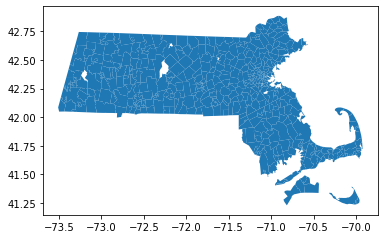

In [10]:
p_mass = MassZCTA.plot()

In [11]:
Middlesex = ('01431','01432','01434','01450','01460','01463','01464','01469','01470','01471','01472','01474','01701','01702','01703','01704','01705','01718','01719','01720','01721','01730','01731','01741','01742','01746','01748','01749','01752','01754','01760','01770','01773','01775','01776','01778','01784','01801','01803','01805','01813','01815','01821','01822','01824','01826','01827','01850','01851','01852','01853','01854','01862','01863','01864','01865','01866','01867','01876','01879','01880','01886','01887','01888','01889','01890','02138','02139','02140','02141','02143','02144','02145','02148','02149','02153','02155','02156','02176','02180','02238','02420','02421','02451','02453','02454','02455','02456','02458','02459','02460','02461','02462','02464','02465','02466','02467','02468','02471','02472','02474','02475','02476','02477','02478','02479','02493','02495','02142','02452')
Middlesex_Boun = MassZCTA[MassZCTA['ZCTA5CE10'].isin(Middlesex)]
Middlesex_Boun

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
35,25,02462,2502462,B5,G6350,S,1369318,69749,+42.3287076,-071.2559002,N,"MULTIPOLYGON (((-71.23198 42.32593, -71.23238 ..."
36,25,01431,2501431,B5,G6350,S,61389725,1002029,+42.6762927,-071.8325227,N,"POLYGON ((-71.85977 42.71049, -71.85139 42.710..."
37,25,01760,2501760,B5,G6350,S,38359306,2599042,+42.2848223,-071.3488109,N,"POLYGON ((-71.40116 42.28765, -71.40140 42.288..."
38,25,02452,2502452,B5,G6350,S,9580492,86311,+42.3920725,-071.2184428,N,"MULTIPOLYGON (((-71.23532 42.40589, -71.23535 ..."
39,25,02476,2502476,B5,G6350,S,5422176,191590,+42.4156366,-071.1756700,N,"POLYGON ((-71.17558 42.42603, -71.17387 42.425..."
...,...,...,...,...,...,...,...,...,...,...,...,...
515,25,01748,2501748,B5,G6350,S,68016796,4215056,+42.2241036,-071.5404842,N,"POLYGON ((-71.48495 42.23104, -71.48477 42.231..."
516,25,01752,2501752,B5,G6350,S,54041301,3200938,+42.3496175,-071.5472140,N,"POLYGON ((-71.57031 42.31966, -71.57083 42.319..."
517,25,01876,2501876,B5,G6350,S,52981194,935803,+42.6118008,-071.2275708,N,"POLYGON ((-71.20327 42.56962, -71.20696 42.571..."
518,25,01776,2501776,B5,G6350,S,62778117,1244383,+42.3833674,-071.4210704,N,"POLYGON ((-71.40543 42.42752, -71.40519 42.427..."


### Map of Middlesex County

In [12]:
Middlesex_Boun.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands.  British Virgin Island

In [13]:
Proj_Middlesex_Boun = Middlesex_Boun.to_crs("epsg:26986")
Proj_Middlesex_Boun.head(2)

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
35,25,02462,2502462,B5,G6350,S,1369318,69749,+42.3287076,-071.2559002,N,"MULTIPOLYGON (((222090.890 897305.465, 222058...."
36,25,01431,2501431,B5,G6350,S,61389725,1002029,+42.6762927,-071.8325227,N,"POLYGON ((170526.616 940050.464, 171213.235 94..."


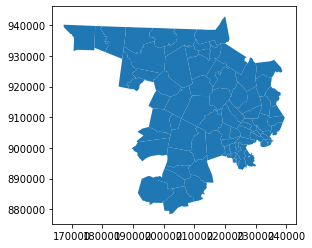

In [14]:
p_Middlesex = Proj_Middlesex_Boun.plot()

In [15]:
Proj_Middlesex_Boun['area'] = Proj_Middlesex_Boun.area
Proj_Middlesex_Boun.head(2)

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry,area
35,25,02462,2502462,B5,G6350,S,1369318,69749,+42.3287076,-071.2559002,N,"MULTIPOLYGON (((222090.890 897305.465, 222058....",1.438971e+06
36,25,01431,2501431,B5,G6350,S,61389725,1002029,+42.6762927,-071.8325227,N,"POLYGON ((170526.616 940050.464, 171213.235 94...",6.239164e+07


In [16]:
joined_Pop = Proj_Middlesex_Boun.merge(ACS_AgeSex,left_on='ZCTA5CE10', right_on='NAME')
joined_Pop.head()

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,...,S0101_C06_034E,S0101_C06_034M,S0101_C06_035E,S0101_C06_035M,S0101_C06_036E,S0101_C06_036M,S0101_C06_037E,S0101_C06_037M,S0101_C06_038E,S0101_C06_038M
0,25,02462,2502462,B5,G6350,S,1369318,69749,+42.3287076,-071.2559002,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
1,25,01431,2501431,B5,G6350,S,61389725,1002029,+42.6762927,-071.8325227,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
2,25,01760,2501760,B5,G6350,S,38359306,2599042,+42.2848223,-071.3488109,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
3,25,02452,2502452,B5,G6350,S,9580492,86311,+42.3920725,-071.2184428,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
4,25,02476,2502476,B5,G6350,S,5422176,191590,+42.4156366,-071.1756700,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)


In [17]:
joined_Pop['S0101_C01_001E'] = joined_Pop['S0101_C01_001E'].astype(int)

In [18]:
joined_Pop['population_per_area'] = joined_Pop.S0101_C01_001E / joined_Pop.area
joined_Pop

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,...,S0101_C06_034M,S0101_C06_035E,S0101_C06_035M,S0101_C06_036E,S0101_C06_036M,S0101_C06_037E,S0101_C06_037M,S0101_C06_038E,S0101_C06_038M,population_per_area
0,25,02462,2502462,B5,G6350,S,1369318,69749,+42.3287076,-071.2559002,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),0.000965
1,25,01431,2501431,B5,G6350,S,61389725,1002029,+42.6762927,-071.8325227,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),0.000052
2,25,01760,2501760,B5,G6350,S,38359306,2599042,+42.2848223,-071.3488109,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),0.000873
3,25,02452,2502452,B5,G6350,S,9580492,86311,+42.3920725,-071.2184428,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),0.001542
4,25,02476,2502476,B5,G6350,S,5422176,191590,+42.4156366,-071.1756700,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),0.003104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,25,01748,2501748,B5,G6350,S,68016796,4215056,+42.2241036,-071.5404842,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),0.000244
79,25,01752,2501752,B5,G6350,S,54041301,3200938,+42.3496175,-071.5472140,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),0.000694
80,25,01876,2501876,B5,G6350,S,52981194,935803,+42.6118008,-071.2275708,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),0.000573
81,25,01776,2501776,B5,G6350,S,62778117,1244383,+42.3833674,-071.4210704,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),0.000299


In [19]:
type(joined_Pop)

geopandas.geodataframe.GeoDataFrame

In [20]:
joined_Pop.crs

<Projected CRS: EPSG:26986>
Name: NAD83 / Massachusetts Mainland
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Text(0.5, 0.98, 'Population Density in Middlesex')

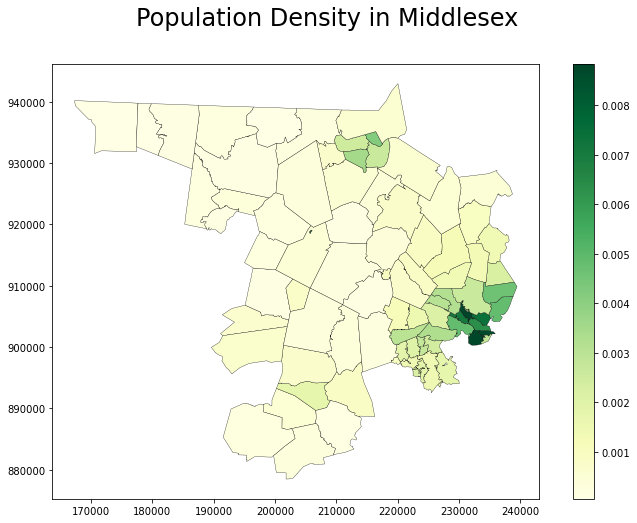

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = joined_Pop.plot(ax=ax, 
                     column='population_per_area',
                     cmap='YlGn',
                     edgecolor='k',
                     linewidth=0.3,
                     legend = True)

plt.suptitle('Population Density in Middlesex', 
             fontsize=24) 

In [22]:
joined_Pop.sort_values('population_per_area', ascending = False)

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,...,S0101_C06_034M,S0101_C06_035E,S0101_C06_035M,S0101_C06_036E,S0101_C06_036M,S0101_C06_037E,S0101_C06_037M,S0101_C06_038E,S0101_C06_038M,population_per_area
17,25,02144,2502144,B5,G6350,S,2802134,6468,+42.3996553,-071.1225501,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),0.008837
53,25,02139,2502139,B5,G6350,S,4031035,368360,+42.3629856,-071.1033529,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),0.008801
50,25,02141,2502141,B5,G6350,S,1657355,29054,+42.3702998,-071.0825603,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),0.008612
47,25,02145,2502145,B5,G6350,S,3615157,234798,+42.3915769,-071.0899097,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),0.007378
18,25,02140,2502140,B5,G6350,S,2987938,53843,+42.3921567,-071.1339958,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),0.007065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,25,01469,2501469,B5,G6350,S,59261468,606711,+42.6650588,-071.6953325,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),0.000128
71,25,01770,2501770,B5,G6350,S,40966896,961380,+42.2335699,-071.3746897,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),0.000103
72,25,01827,2501827,B5,G6350,S,42620556,784744,+42.6760778,-071.5005167,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),0.000078
48,25,01474,2501474,B5,G6350,S,25690700,78185,+42.6696848,-071.7527513,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),0.000070


### Population density of Milddles

* Polulation density is one of the crutial factors, since more population in one specific area, in some way, suggesting that the potential demand of library is relatively high.
* The map shows that Somerville and Cambridge have the highest population densities, indicating that the demand for libraries in these two areas is more urgent than in other areas.

In [23]:
Firestation  = gpd.read_file("uep239-final-project-data/vector/MassGIS/FIRESTATIONS_PT_MEMA/FIRESTATIONS_PT_MEMA.shp")
Firestation.head(2)

,NAME,OFFICE,ADDRESS,CITY,STATE,ZIP,L_SRC,SOURCE,L_DATE,geometry
0,MILLBURY FIRE DEPARTMENT,Headquarters,127 Elm Street,MILLBURY,MA,01527,MEMA,MEMA,2006-08-16,POINT (178301.924 882279.531)
1,MILLBURY FIRE DEPARTMENT,Station 5,240 Millbury Avenue,MILLBURY,MA,01527,MEMA,MEMA,2006-08-16,POINT (178898.504 885197.611)


In [24]:
Firestation.crs

<Projected CRS: EPSG:26986>
Name: NAD83 / Massachusetts Mainland
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [25]:
Middlesex_Firestation = Firestation[Firestation['ZIP'].isin(Middlesex)]
Middlesex_Firestation

,NAME,OFFICE,ADDRESS,CITY,STATE,ZIP,L_SRC,SOURCE,L_DATE,geometry
22,GROTON FIRE DEPARTMENT,Station 3 - Lost Lake,185 Lost Lake Drive,GROTON,MA,01450,MRPC,MRPC&TOWN,2005-08-26,POINT (198002.044 928212.941)
23,AYER FIRE DEPARTMENT,Headquarters,14 Washington Street,AYER,MA,01432,MRPC,"DFS,MEMA",2005-08-26,POINT (192769.614 923321.081)
48,ARLINGTON FIRE DEPARTMENT,Headquarters,1 Monument Park,ARLINGTON,MA,02474,MAPC,MEMA,2005-06-16,POINT (228826.754 907094.041)
49,ARLINGTON FIRE DEPARTMENT,Park Circle Station,291 Park Avenue,ARLINGTON,MA,02476,MAPC,MEMA,2005-06-16,POINT (226260.514 907243.951)
50,ARLINGTON FIRE DEPARTMENT,Highland Station,1007 Massachusetts Avenue,ARLINGTON,MA,02476,MAPC,MEMA,2005-06-16,POINT (227280.684 907775.821)
...,...,...,...,...,...,...,...,...,...,...
768,PEPPERELL FIRE DEPARTMENT,Station 2,38 Park Street,PEPPERELL,MA,01463,NMCOG,NMCOG,2006-08-16,POINT (191792.944 935889.771)
769,TEWKSBURY FIRE DEPARTMENT,Headquarters,21 Town Hall Avenue,TEWKSBURY,MA,01876,NMCOG,MEMA,2006-08-16,POINT (221824.734 929005.841)
770,TEWKSBURY FIRE DEPARTMENT,North Street Station,830 North Street,TEWKSBURY,MA,01876,NMCOG,MEMA,2006-08-16,POINT (221454.684 931797.651)
771,TEWKSBURY FIRE DEPARTMENT,South Street Station,2342 Main Street,TEWKSBURY,MA,01876,NMCOG,MEMA,2006-08-16,POINT (225189.214 925496.801)


In [26]:
StationCount = Middlesex_Firestation['NAME'].groupby(Middlesex_Firestation['ZIP']).agg(['count'])
StationCount

,count
ZIP,
01431,2
01432,2
01450,3
01460,1
01463,3
...,...
02472,3
02474,1
02476,2


In [27]:
df = pd.DataFrame(columns = ['ZIP','Count'])

In [28]:
Count = []
for zipcode in Middlesex:
    count = 0
    for data in range(163):
        if zipcode in Middlesex_Firestation.iloc[data,:]['ZIP']:
            count += 1
    Count.append(count)


In [29]:
df['ZIP'] = Middlesex
df['Count'] = Count
StationCount = df
StationCount

,ZIP,Count
0,01431,2
1,01432,2
2,01434,0
3,01450,3
4,01460,1
...,...,...
105,02479,0
106,02493,2
107,02495,0
108,02142,0


In [30]:
Stationcount_joined= StationCount.merge(Proj_Middlesex_Boun,left_on='ZIP', right_on='ZCTA5CE10')

In [31]:
type(Stationcount_joined)

pandas.core.frame.DataFrame

In [32]:
gpd_Stationcount_joined = gpd.GeoDataFrame(Stationcount_joined)

Text(0.5, 0.98, 'Fire Stations in Middlesex')

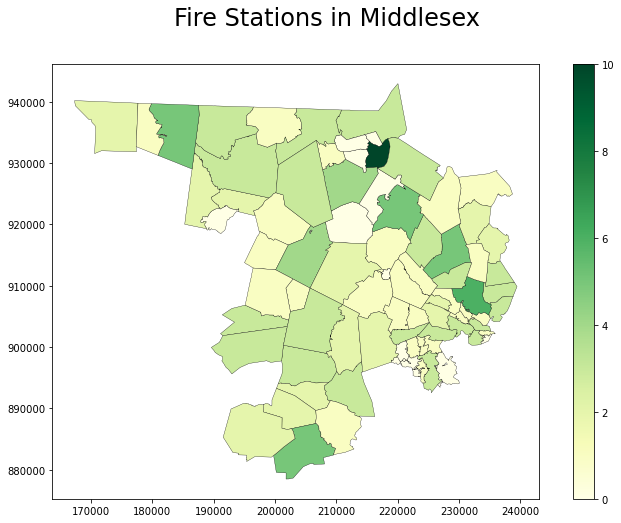

In [33]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = gpd_Stationcount_joined.plot(ax=ax, 
                                  column='Count',
                                  cmap='YlGn',
                                  edgecolor='k',
                                  linewidth=0.3, 
                                  legend=True)

plt.suptitle('Fire Stations in Middlesex', 
             fontsize=24) 

In [34]:
gpd_Stationcount_joined.sort_values('Count', ascending = False)

,ZIP,Count,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry,area
38,01852,10,25,01852,2501852,B5,G6350,S,12828750,627353,+42.6318494,-071.2957847,N,"POLYGON ((216666.539 929362.128, 216654.808 92...",1.345591e+07
59,02155,6,25,02155,2502155,B5,G6350,S,21229511,1455993,+42.4238395,-071.1076732,N,"POLYGON ((233992.405 909654.339, 233977.075 90...",2.268425e+07
30,01801,5,25,01801,2501801,B5,G6350,S,32769438,806847,+42.4886587,-071.1544250,N,"POLYGON ((231553.725 915754.053, 231572.716 91...",3.357475e+07
32,01821,5,25,01821,2501821,B5,G6350,S,42910631,1026154,+42.5493295,-071.2517245,N,"POLYGON ((216664.647 923501.796, 216665.117 92...",4.393530e+07
7,01469,5,25,01469,2501469,B5,G6350,S,59261468,606711,+42.6650588,-071.6953325,N,"POLYGON ((187301.713 935189.890, 187284.423 93...",5.986790e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,02462,0,25,02462,2502462,B5,G6350,S,1369318,69749,+42.3287076,-071.2559002,N,"MULTIPOLYGON (((222090.890 897305.465, 222058....",1.438971e+06
37,01851,0,25,01851,2501851,B5,G6350,S,8645533,115440,+42.6278117,-071.3353295,N,"POLYGON ((212158.921 930248.853, 211617.066 93...",8.760843e+06
17,01741,0,25,01741,2501741,B5,G6350,S,39536091,641968,+42.5366203,-071.3618321,N,"POLYGON ((210666.732 922981.891, 210682.569 92...",4.017655e+07
36,01850,0,25,01850,2501850,B5,G6350,S,3521737,305905,+42.6560445,-071.3033091,N,"POLYGON ((215924.002 933110.964, 215900.018 93...",3.827603e+06


### Firestation is also important since Library

* As a pubic area, often attracts students, tourists. If a fire breaks out in the library, and if there is no firestation, the consequences can be extrenmenly bad. Therefore, when doing siting analysis, firestation should be a key factor.

* Based on the map, cities with darker green indicating that more firestations locate in it. Lowell has the most firestations.

In [35]:
Colleges = gpd.read_file("./uep239-final-project-data/vector/MassGIS/COLLEGES_PT/COLLEGES_PT.shp")
Colleges.head(2)

,COLLEGE,CAMPUS,ADDRESS,CITY,ZIPCODE,PLUS_FOUR,GEOG_TOWN,MAIN_TEL,URL,NCES_ID,TYPE,NCES_TYPE,CATEGORY,DEGREEOFFR,AWARDSOFFR,LARGEPROG,CAMPUSSETT,CAMPUSHOUS,L_SRC,geometry
0,Cape Cod Electrical School,None,9 New Venture Drive,South Dennis,02660,None,DENNIS,(508) 760-1983,http://capecodelectricalschool.com/,None,PRI,"< 2-year, Private for-profit",Private Occupational Program,C,"Journeyman, Master, Systems Technician, System...",Electrician,Town: Fringe,No,mass.gov,POINT (313075.813 827487.626)
1,Cape Cod Community College,Main Campus,2240 Iyanough Road,West Barnstable,02668,1599,BARNSTABLE,(508) 362-2131,http://www.capecod.edu/,165194,PUB,"2-year, Public",Community College,"C, A",Less than one year certificate;Associate's degree,None,City: Small,No,nces.ed.gov,POINT (296838.814 827550.896)


In [36]:
Middlesex_College = Colleges[Colleges['ZIPCODE'].isin(Middlesex)]
Middlesex_College

,COLLEGE,CAMPUS,ADDRESS,CITY,ZIPCODE,PLUS_FOUR,GEOG_TOWN,MAIN_TEL,URL,NCES_ID,TYPE,NCES_TYPE,CATEGORY,DEGREEOFFR,AWARDSOFFR,LARGEPROG,CAMPUSSETT,CAMPUSHOUS,L_SRC,geometry
57,Massachusetts Bay Community College,Ashland - Auto Tech Center,250 Eliot Street,Ashland,01721,2389,ASHLAND,(781) 239-3030,http://www.massbay.edu,166647,PUB,"2-year, Public",Community College,"C, A",Less than one year certificate;One but less th...,None,Suburb: Large,No,nces.ed.gov,POINT (205279.276 887961.666)
63,Boston College,Main Campus,140 Commonwealth Avenue,Chestnut Hill,02467,None,NEWTON,(617) 552-8000,http://www.bc.edu,164924,PRI,"4-year, Private not-for-profit",Research University,"C, B, PBC, M, PMC, D",Less than one year certificate;Bachelor's degr...,None,City: Small,Yes,nces.ed.gov,POINT (227298.584 898333.067)
73,Blessed John Xxiii National Seminary,None,558 South Avenue,Weston,02493,None,WESTON,(781) 899-5500,http://www.psjs.edu,167464,PRI,"4-year, Private not-for-profit",Divinity School,M,Master's degree,Catholic Seminary,Suburb: Large,Yes,nces.ed.gov,POINT (215576.026 898808.188)
99,Massachusetts Bay Community College,Framingham,19 Flagg Drive,Framingham,01702,5928,FRAMINGHAM,(508) 270-4000,http://www.massbay.edu,166647,PUB,"2-year, Public",Community College,"C, A",Less than one year certificate;One but less th...,None,Suburb: Large,No,nces.ed.gov,POINT (207086.870 893523.568)
103,William James College,None,1 Wells Avenue,Newton,02459,None,NEWTON,(617) 327-6777,http://www.williamjames.edu/,166717,PRI,"4-year, Private not-for-profit",Private College,"B, PBC, M, D",Bachelor's degree;Postbaccalaureate certificat...,Psychology,City: Small,No,nces.ed.gov,POINT (224467.710 893883.586)
104,Empire Beauty School,Framingham,624 Worcester Road,Framingham,01701,None,FRAMINGHAM,(508) 370-7447,http://www.empire.edu,443678,PRI,"< 2-year, Private for-profit",Private Vocational School,C,One but less than two years certificate,"Cosmetology/Cosmetologist, General",City: Small,No,nces.ed.gov,POINT (206418.884 894150.311)
105,Framingham State University,None,100 State Street,Framingham,01701,9101,FRAMINGHAM,(508) 620-1220,http://www.framingham.edu,165866,PUB,"4-year, Public",State University,"B, PBC, M",Bachelor's degree;Postbaccalaureate certificat...,Education,City: Small,Yes,nces.ed.gov,POINT (205270.962 894171.497)
113,Pine Manor College,None,400 Heath Street,Chestnut Hill,02467,None,BROOKLINE,(617) 731-7000,http://www.pmc.edu,167455,PRI,"4-year, Private not-for-profit",Liberal Arts College,"A, B, M",Associate's degree;Bachelor's degree;Master's ...,None,Suburb: Large,Yes,nces.ed.gov,POINT (228310.620 896760.105)
115,Andover Newton Theological School,None,210 Herrick Road,Newton Centre,02459,None,NEWTON,(617) 964-1100,http://www.ants.edu,164474,PRI,"4-year, Private not-for-profit",Divinity School,"PBC, M, PMC, D",Postbaccalaureate certificate;Master's degree;...,Theology,City: Small,No,nces.ed.gov,POINT (225678.254 897165.561)
116,Hebrew College,None,160 Herrick Road,Newton Centre,02459,None,NEWTON,(617) 559-8600,http://www.hebrewcollege.edu,166045,PRI,"4-year, Private not-for-profit",Divinity School,"B, PBC, M, PMC",Bachelor's degree;Postbaccalaureate certificat...,Jewish Studies,City: Small,No,nces.ed.gov,POINT (225616.591 897289.733)


In [37]:
Middlesex_College.crs

<Projected CRS: EPSG:26986>
Name: NAD83 / Massachusetts Mainland
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [38]:
df = pd.DataFrame(columns = ['ZIP','Count'])
Count = []
for zipcode in Middlesex:
    count = 0
    for data in range(57):
        if zipcode in Middlesex_College.iloc[data,:]['ZIPCODE']:
            count += 1
    Count.append(count)
df['ZIP'] = Middlesex
df['Count'] = Count
CollegeCount = df
CollegeCount

,ZIP,Count
0,01431,0
1,01432,0
2,01434,0
3,01450,0
4,01460,0
...,...,...
105,02479,0
106,02493,2
107,02495,0
108,02142,0


In [39]:
CollegeCount_joined= CollegeCount.merge(Proj_Middlesex_Boun,left_on='ZIP', right_on='ZCTA5CE10')
CollegeCount_joined.head(2)

,ZIP,Count,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry,area
0,01431,0,25,01431,2501431,B5,G6350,S,61389725,1002029,+42.6762927,-071.8325227,N,"POLYGON ((170526.616 940050.464, 171213.235 94...",6.239164e+07
1,01432,0,25,01432,2501432,B5,G6350,S,21888062,1219817,+42.5665731,-071.5751350,N,"POLYGON ((195094.082 921804.570, 195038.732 92...",2.310717e+07


In [40]:
gpd_CollegeCount_joined = gpd.GeoDataFrame(CollegeCount_joined)

Text(0.5, 0.98, 'Colleges in Middlesex')

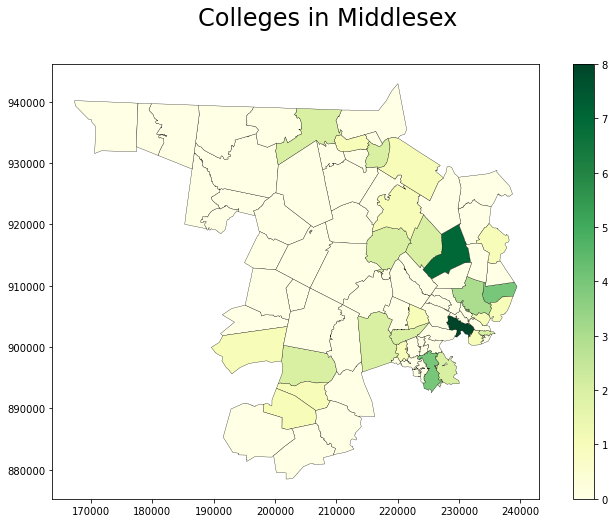

In [41]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = gpd_CollegeCount_joined.plot(ax=ax, 
                                  column='Count',
                                  cmap='YlGn',
                                  edgecolor='k',
                                  linewidth=0.3, 
                                  legend=True)

plt.suptitle('Colleges in Middlesex', 
             fontsize=24) 

In [42]:
gpd_CollegeCount_joined.sort_values('Count', ascending = False)

,ZIP,Count,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry,area
50,02138,8,25,02138,2502138,B5,G6350,S,7097709,838564,+42.3796372,-071.1351523,N,"POLYGON ((228180.962 903579.238, 228178.405 90...",7.935781e+06
30,01801,7,25,01801,2501801,B5,G6350,S,32769438,806847,+42.4886587,-071.1544250,N,"POLYGON ((231553.725 915754.053, 231572.716 91...",3.357475e+07
67,02459,4,25,02459,2502459,B5,G6350,S,12962330,218481,+42.3147789,-071.1920167,N,"POLYGON ((224956.247 896551.846, 225030.195 89...",1.317992e+07
57,02148,4,25,02148,2502148,B5,G6350,S,13063769,99890,+42.4301399,-071.0576939,N,"POLYGON ((233892.153 908178.713, 233850.753 90...",1.316292e+07
59,02155,3,25,02155,2502155,B5,G6350,S,21229511,1455993,+42.4238395,-071.1076732,N,"POLYGON ((233992.405 909654.339, 233977.075 90...",2.268425e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,01851,0,25,01851,2501851,B5,G6350,S,8645533,115440,+42.6278117,-071.3353295,N,"POLYGON ((212158.921 930248.853, 211617.066 93...",8.760843e+06
40,01862,0,25,01862,2501862,B5,G6350,S,23934124,1075799,+42.5785430,-071.2955915,N,"POLYGON ((218531.795 924908.022, 218539.842 92...",2.500921e+07
1,01432,0,25,01432,2501432,B5,G6350,S,21888062,1219817,+42.5665731,-071.5751350,N,"POLYGON ((195094.082 921804.570, 195038.732 92...",2.310717e+07
42,01864,0,25,01864,2501864,B5,G6350,S,34032377,923752,+42.5782217,-071.0843981,N,"POLYGON ((230155.269 924746.589, 230176.872 92...",3.495519e+07


In [43]:
Schools = gpd.read_file("./uep239-final-project-data/vector/MassGIS/SCHOOLS_PT/SCHOOLS_PT.shp")
Schools.head(2)

,SCHID,NAME,ADDRESS,TOWN_MAIL,TOWN,ZIPCODE,PHONE,GRADES,TYPE,TYPE_DESC,DIST_NAME,DIST_CODE,MAD_ID,TYPE_DESC2,geometry
0,03090020,Stanley M Koziol Elementary School,4 Gould Road,Ware,WARE,01082,413-967-6236,"PK,K,01,02,03",ELE,Public Elementary,Ware,03090000,1003108,None,POINT (137104.992 889501.256)
1,06220010,Millville Elementary School,122 Berthelette Way,Millville,MILLVILLE,01529,508-876-0177,"PK,K,01,02,03,04,05",ELE,Public Elementary,Blackstone-Millville,06220000,1708902,None,POINT (193535.347 864680.374)


In [44]:
Middlesex_Schools = Schools[Schools['ZIPCODE'].isin(Middlesex)]
Middlesex_Schools

,SCHID,NAME,ADDRESS,TOWN_MAIL,TOWN,ZIPCODE,PHONE,GRADES,TYPE,TYPE_DESC,DIST_NAME,DIST_CODE,MAD_ID,TYPE_DESC2,geometry
3,04560050,Lowell Community Charter Public School,206 Jackson Street,Lowell,LOWELL,01852,978-323-0800,"PK,K,01,02,03,04,05,06,07,08",CHA,Charter,Lowell Community Charter,04560000,1978735,None,POINT (215408.324 932324.148)
12,03260025,Col. John Robinson School,60 Concord Road,Westford,WESTFORD,01886,978-692-5586,"K,01,02",ELE,Public Elementary,Westford,03260000,1474003,None,POINT (203121.482 924564.556)
31,02460305,Arthur W Coolidge Middle School,89 Birch Meadow Drive,Reading,READING,01867,781-942-9158,"06,07,08",SEC,Public Secondary,Reading,02460000,2606105,None,POINT (232044.658 920927.907)
32,01600330,Henry J Robinson Middle School,110 June Street,Lowell,LOWELL,01850,978-937-8974,"05,06,07,08",SEC,Public Secondary,Lowell,01600000,1986905,None,POINT (216234.074 934341.257)
33,00670825,Nashoba Brooks School,200 Strawberry Hill Road,Concord,CONCORD,01742,978-369-4591,"PK,K,01,02,03,04,05,06,07,08",PRI,Private,None,None,2352988,None,POINT (209819.860 914205.402)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2401,01550802,The LEAP School,210 Marrett Road,Lexington,LEXINGTON,02421,781-861-1026,PK,SPU,Special Education (Unapproved),None,None,2537594,None,POINT (222506.852 909238.591)
2436,00490820,Wild Rose Montessori School,2284 Massachusetts Avenue,Cambridge,CAMBRIDGE,02140,804-855-8739,"K,01,02,03",PRI,Private,None,None,3621651,None,POINT (230654.638 904979.469)
2441,01580860,JRI Meadowridge Littleton Academy,22 King Street,Littleton,LITTLETON,01460,978-952-6809,"K,01,02,03,04,05,06,07,08,09,10,11,12",SPE,Special Education (Approved),None,None,1607508,None,POINT (199186.831 920999.092)
2443,00350891,Yeshiva Ohr Yisrael High School for Boys,325 Reservoir Road,Chestnut Hill,BOSTON,02467,781-499-2332,"09,10,11,12",PRI,Private,None,None,35115287,None,POINT (228315.885 897915.673)


Text(0.5, 0.98, 'Schools in Middlesex')

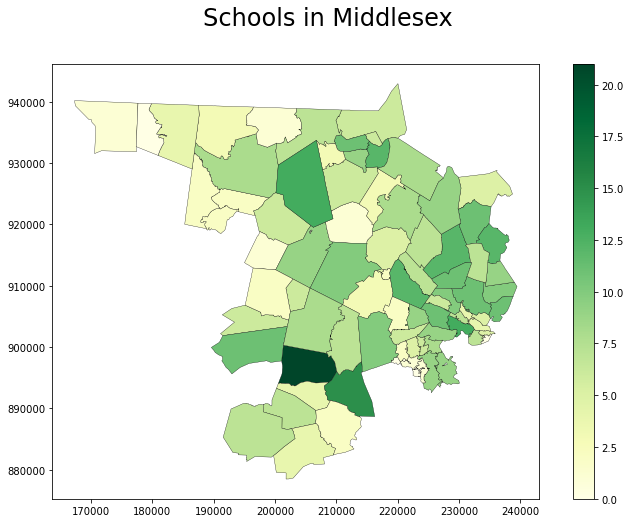

In [45]:
#count 
df = pd.DataFrame(columns = ['ZIP','Count'])
Count = []
for zipcode in Middlesex:
    count = 0
    for data in range(535):
        if zipcode in Middlesex_Schools.iloc[data,:]['ZIPCODE']:
            count += 1
    Count.append(count)
df['ZIP'] = Middlesex
df['Count'] = Count

#merge
SchoolCount = df
SchoolCount_joined= SchoolCount.merge(Proj_Middlesex_Boun,left_on='ZIP', right_on='ZCTA5CE10')
gpd_SchoolCount_joined = gpd.GeoDataFrame(SchoolCount_joined)

#plot
fig, ax = plt.subplots(figsize=(12, 8))
ax = gpd_SchoolCount_joined.plot(ax=ax, 
                                 column='Count',
                                 cmap='YlGn',
                                 edgecolor='k',
                                 linewidth=0.3, 
                                 legend=True)

plt.suptitle('Schools in Middlesex', 
             fontsize=24) 

In [46]:
gpd_SchoolCount_joined.sort_values('Count', ascending = False)

,ZIP,Count,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry,area
9,01701,21,25,01701,2501701,B5,G6350,S,43923156,1816225,+42.3201685,-071.4404090,N,"POLYGON ((200833.022 894797.041, 200847.034 89...",4.573634e+07
24,01760,15,25,01760,2501760,B5,G6350,S,38359306,2599042,+42.2848223,-071.3488109,N,"POLYGON ((208151.539 893024.178, 208131.535 89...",4.095551e+07
50,02138,13,25,02138,2502138,B5,G6350,S,7097709,838564,+42.3796372,-071.1351523,N,"POLYGON ((228180.962 903579.238, 228178.405 90...",7.935781e+06
47,01886,13,25,01886,2501886,B5,G6350,S,78391449,2854186,+42.5852953,-071.4398262,N,"POLYGON ((200447.384 928418.855, 200448.696 92...",8.124356e+07
30,01801,12,25,01801,2501801,B5,G6350,S,32769438,806847,+42.4886587,-071.1544250,N,"POLYGON ((231553.725 915754.053, 231572.716 91...",3.357475e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,02462,0,25,02462,2502462,B5,G6350,S,1369318,69749,+42.3287076,-071.2559002,N,"MULTIPOLYGON (((222090.890 897305.465, 222058....",1.438971e+06
71,02464,0,25,02464,2502464,B5,G6350,S,1463154,29494,+42.3129751,-071.2188818,N,"MULTIPOLYGON (((223740.792 895909.947, 223788....",1.492544e+06
11,01718,0,25,01718,2501718,B5,G6350,S,121367,0,+42.5198155,-071.4292828,N,"POLYGON ((205672.773 918825.051, 205682.213 91...",1.213628e+05
8,01474,0,25,01474,2501474,B5,G6350,S,25690700,78185,+42.6696848,-071.7527513,N,"POLYGON ((179312.070 939685.667, 179471.173 93...",2.576877e+07


### Colleges and schools also are important factors

* More colleges and school in one area means more students, which inhance the demand of the study area like library.
* Based on the map, Framingham has the most schools while Woburn has the most colleges.

In [47]:
Libraries = gpd.read_file("./uep239-final-project-data/vector/MassGIS/LIBRARIES_PT/LIBRARIES_PT.shp")
Libraries.head(2)

,NAME,ADDRESS,TOWN,STATE,ZIP,TYPE,ADDRESS_PO,LIBKEY,NETWORK,REGION,DELIVROUTE,WEBSITE,geometry
0,EGREMONT FREE LIBRARY,1 BUTTONBALL LANE,EGREMONT,MA,01230,PUBLIC,M_42081_880811,PU-EGREMONT-FREE,C/WMARS,Western,Optima,http://egremont-ma.gov/,POINT (42080.824 880810.865)
1,FLORIDA FREE PUBLIC LIBRARY,56 NORTH COUNTY ROAD,FLORIDA,MA,01247,PUBLIC,M_73999_939186,PU-FLORIDA-FREE,C/WMARS,Western,Optima,None,POINT (73998.820 939185.588)


In [48]:
Middlesex_Libraries = Libraries[Libraries['ZIP'].isin(Middlesex)]
Middlesex_Libraries

,NAME,ADDRESS,TOWN,STATE,ZIP,TYPE,ADDRESS_PO,LIBKEY,NETWORK,REGION,DELIVROUTE,WEBSITE,geometry
12,ROBBINS LIBRARY,700 MASSACHUSETTS AVENUE,ARLINGTON,MA,02476,PUBLIC,M_228383_907296,PU-ARLINGTO-ROBBINS,MLN,Metrowest,Metrowest Region,http://www.robbinslibrary.org,POINT (228382.659 907296.371)
13,BACON FREE LIBRARY,58 ELIOT STREET,NATICK,MA,01760,PUBLIC,M_215167_891319,PU-NATICK-BACON,MLN,Metrowest,Metrowest Region,http://baconfreelibrary.net/,POINT (215167.242 891319.118)
17,MALDEN PUBLIC LIBRARY,36 SALEM STREET,MALDEN,MA,02148,PUBLIC,M_235699_908691,PU-MALDEN-PUBLIC,MBLN,Boston,Boston Region,http://www.maldenpubliclibrary.org/,POINT (235698.507 908691.000)
22,FRAMINGHAM PUBLIC LIBRARY,49 LEXINGTON STREET,FRAMINGHAM,MA,01702,PUBLIC,M_206842_892393,PU-FRAMINGH-PUBLIC,MLN,Metrowest,Metrowest Region,http://www.framinghamlibrary.org/,POINT (206866.878 892400.854)
45,READING PUBLIC LIBRARY,64 MIDDLESEX AVENUE,READING,MA,01867,PUBLIC,M_232019_919581,PU-READING-PUBLIC,NOBLE,Northeast,Northeast Region,http://www.readingpl.org/,POINT (232019.221 919581.169)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,O'CONNELL BRANCH LIBRARY,48 SIXTH STREET,CAMBRIDGE,MA,02141,PUBLIC BRANCH,M_234197_902300,PU-CAMBRIDG-PUBLIC,MLN,Metrowest,Metrowest Region,http://www.cambridgepubliclibrary.org,POINT (234197.397 902300.068)
441,STONEHAM PUBLIC LIBRARY,431 MAIN STREET,STONEHAM,MA,02180,PUBLIC,M_232835_914228,PU-STONEHAM-PUBLIC,NOBLE,Northeast,Northeast Region,http://www.stonehamlibrary.org,POINT (232834.542 914228.185)
444,REUBEN HOAR LIBRARY,41 SHATTUCK STREET,LITTLETON,MA,01460,PUBLIC,M_201590_921294,PU-LITTLETO-HOAR,MVLC,Northeast,Northeast Region,http://www.littletonlibrary.org,POINT (201584.542 921260.045)
447,WINCHESTER PUBLIC LIBRARY,80 WASHINGTON STREET,WINCHESTER,MA,01890,PUBLIC,M_230096_911369,PU-WINCHEST-PUBLIC,MLN,Metrowest,Metrowest Region,http://www.winpublib.org,POINT (230096.244 911368.946)


Text(0.5, 0.98, 'Libraries in Middlesex')

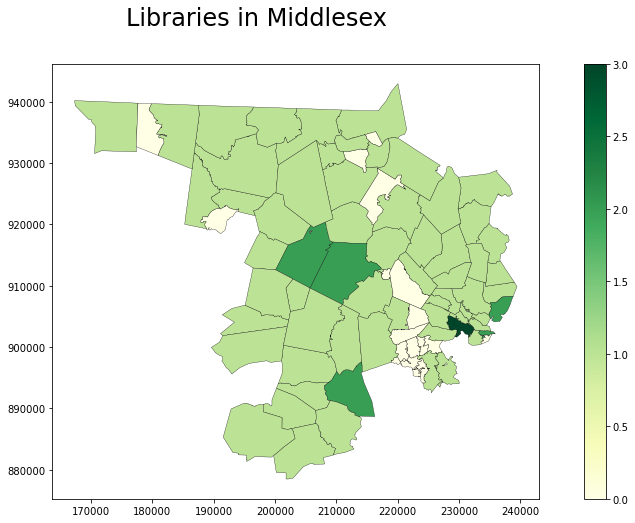

In [49]:
#count 
df = pd.DataFrame(columns = ['ZIP','Count'])
Count = []
for zipcode in Middlesex:
    count = 0
    for data in range(71):
        if zipcode in Middlesex_Libraries.iloc[data,:]['ZIP']:
            count += 1
    Count.append(count)
df['ZIP'] = Middlesex
df['Count'] = Count

#merge
LibraryCount = df
LibraryCount_joined= LibraryCount.merge(Proj_Middlesex_Boun,left_on='ZIP', right_on='ZCTA5CE10')
gpd_LibraryCount_joined = gpd.GeoDataFrame(LibraryCount_joined)

#plot
fig, ax = plt.subplots(figsize=(16, 8))
ax = gpd_LibraryCount_joined.plot(ax=ax, 
                                  column='Count',
                                  cmap='YlGn',
                                  edgecolor='k',
                                  linewidth=0.3, 
                                  legend=True)

plt.suptitle('Libraries in Middlesex', 
             fontsize=24) 

In [50]:
gpd_LibraryCount_joined.sort_values('Count', ascending = False)

,ZIP,Count,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry,area
50,02138,3,25,02138,2502138,B5,G6350,S,7097709,838564,+42.3796372,-071.1351523,N,"POLYGON ((228180.962 903579.238, 228178.405 90...",7.935781e+06
18,01742,2,25,01742,2501742,B5,G6350,S,63296150,3384588,+42.4629107,-071.3644962,N,"POLYGON ((214912.654 914247.761, 214918.759 91...",6.667740e+07
53,02141,2,25,02141,2502141,B5,G6350,S,1657355,29054,+42.3702998,-071.0825603,N,"POLYGON ((234257.854 901957.176, 234157.274 90...",1.686302e+06
58,02149,2,25,02149,2502149,B5,G6350,S,8873256,630370,+42.4059375,-071.0546487,N,"POLYGON ((234890.897 905268.437, 234873.427 90...",9.503080e+06
13,01720,2,25,01720,2501720,B5,G6350,S,51057015,1113826,+42.4839530,-071.4384947,N,"POLYGON ((202152.507 916580.696, 202162.036 91...",5.216842e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,01718,0,25,01718,2501718,B5,G6350,S,121367,0,+42.5198155,-071.4292828,N,"POLYGON ((205672.773 918825.051, 205682.213 91...",1.213628e+05
36,01850,0,25,01850,2501850,B5,G6350,S,3521737,305905,+42.6560445,-071.3033091,N,"POLYGON ((215924.002 933110.964, 215900.018 93...",3.827603e+06
16,01731,0,25,01731,2501731,B5,G6350,S,2049705,0,+42.4567483,-071.2794840,N,"POLYGON ((218695.745 912155.413, 218697.089 91...",2.049599e+06
40,01862,0,25,01862,2501862,B5,G6350,S,23934124,1075799,+42.5785430,-071.2955915,N,"POLYGON ((218531.795 924908.022, 218539.842 92...",2.500921e+07


### About Libraries

* The reason of analyzing number of libraries in cities is that pubilc resources should be allocated more balanced. The map above shows that the unbalance exists. 
* Cambridge has most libraries. It may relate to the long history and strong acedemic background of Cambridge. 
* However,there are quite some cities that has relatively few libraries, such as western of Townsend and western of Billerica. 
* More public attention as well as resources should be transffered or put into.

In [51]:
TransitNodes = gpd.read_file("./uep239-final-project-data/vector/MassGIS/TRAINS_NODE/TRAINS_NODE.shp")
TransitNodes.head(2)

,STATION,C_RAILSTAT,AMTRAK,MAP_STA,LINE_BRNCH,STATE,geometry
0,SHELBURNE FALLS,None,None,Y,None,MA,POINT (98640.445 928045.188)
1,BARDWELL,None,None,Y,None,MA,POINT (103326.898 923460.125)


In [52]:
TransitNodes.crs

<Projected CRS: EPSG:26986>
Name: NAD83 / Massachusetts Mainland
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

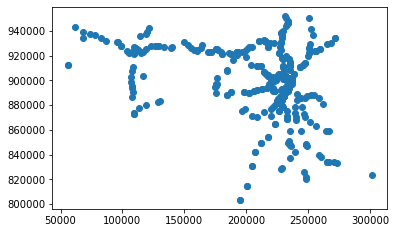

In [53]:
p = TransitNodes.plot()

In [54]:
Middlesex_TransitNodes = gpd.clip(TransitNodes, Proj_Middlesex_Boun)

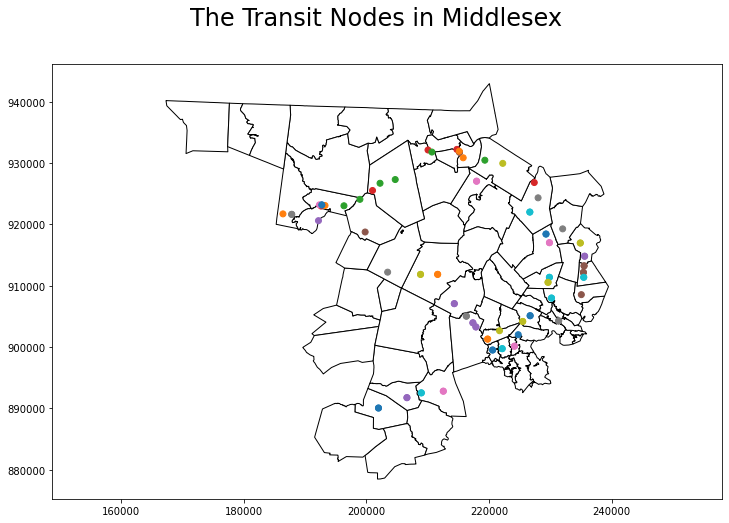

In [57]:
fig, ax = plt.subplots(figsize=(12, 8))

Proj_Middlesex_Boun.plot(alpha=1,
                         color="white",
                         edgecolor="black",
                         ax=ax)

Middlesex_TransitNodes.plot(ax=ax,
                 column='STATION')

plt.axis('equal')

plt.suptitle('The Transit Nodes in Middlesex', fontsize=24)

plt.show()

### About Transportation

* Using public transportation has become one of the main tools for people to travel, and convenient remote transportation can attract more people to the library.
* The transit line of Middlesex presents a loop, passing through cities such as Weston, Lincoln, and Concord.

In [58]:
BusStops = gpd.read_file("./uep239-final-project-data/vector/MassDOT/MBTA_Bus_Routes_and_Stops/MBTA_Bus_Routes_and_Stops.shp")
BusStops.head(2)

,OBJECTID,STOP_ID,STOP_NAME,TOWN,TOWN_ID,geometry
0,1,3077,Gallivan Blvd @ opp Marsh St,BOSTON,35,POINT (237120.669 892643.408)
1,2,841,Lagrange St @ Virgil Rd,BOSTON,35,POINT (227915.195 892644.017)


In [59]:
landcover = rasterio.open('./uep239-final-project-data/raster/NLCD/NLCD_2016_Land_Cover_Boston.tif')

In [60]:
landcover_band = landcover.read()

In [61]:
landcover_band[0]

array([[41, 41, 41, ...,  0,  0,  0],
       [41, 41, 41, ...,  0,  0,  0],
       [41, 41, 41, ...,  0,  0,  0],
       ...,
       [43, 43, 43, ..., 11, 11, 11],
       [43, 43, 43, ..., 11, 11, 11],
       [41, 43, 43, ..., 11, 11, 11]], dtype=uint8)

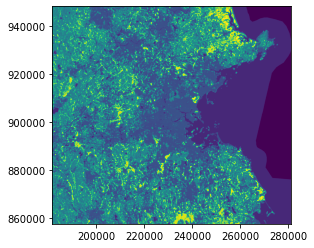

In [62]:
show(landcover_band, transform=landcover.transform)
plt.show()

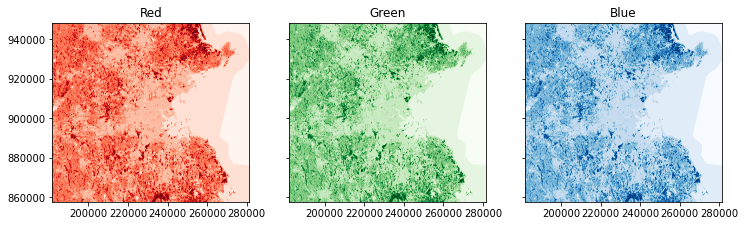

In [63]:
fig, (axr, axg, axb) = plt.subplots(ncols=3, nrows=1, figsize=(12, 6), sharey=True)

show((landcover), cmap='Blues', ax=axb)
show((landcover), cmap='Greens', ax=axg)
show((landcover), cmap='Reds', ax=axr)

axb.set_title("Blue")
axr.set_title("Red")
axg.set_title("Green")

plt.show()

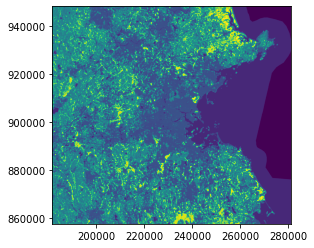

In [64]:
show(landcover)
plt.show()

## Reference of Land Use 

<img src="./uep239-final-project-data/raster/NLCD/NLCD_Land_Cover_Legend.jpg" width="30%">

In [65]:
with rasterio.open('./uep239-final-project-data/raster/NLCD/NLCD_2016_Land_Cover_Boston.tif') as raster:
    shape = raster.shape
    transform = raster.transform
    res = raster.res
    crs = raster.crs
    nodata = raster.nodata
    bounds = raster.bounds
    landcover = raster.read(1)

In [66]:
landcover_reclass = np.full(shape, np.NaN)

In [67]:
landcover_reclass[(landcover > 21) & 
                  (landcover < 24)] = 5

landcover_reclass[(landcover > 20) & 
                  (landcover < 22)] =4 
landcover_reclass[(landcover > 23) & 
                  (landcover < 25)] = 4

landcover_reclass[(landcover > 50) & 
                  (landcover < 53)] =3
landcover_reclass[(landcover > 70) & 
                  (landcover < 75)] = 3

landcover_reclass[(landcover > 80) & 
                  (landcover < 83)] =2
landcover_reclass[(landcover > 89) & 
                  (landcover < 91)] = 2

landcover_reclass[(landcover > 10) & 
                  (landcover < 13)] = 1
landcover_reclass[(landcover > 30) & 
                  (landcover < 32)] = 1
landcover_reclass[(landcover > 40) & 
                  (landcover < 44)] = 1 
landcover_reclass[(landcover > 94) & 
                  (landcover < 96)] = 1

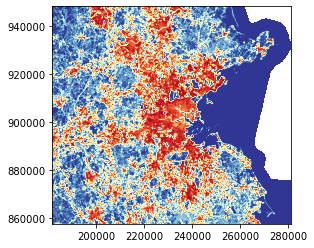

In [68]:
show(landcover_reclass, transform=transform, cmap='RdYlBu_r')
plt.show()

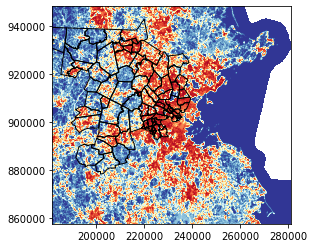

In [69]:
ax = Proj_Middlesex_Boun.plot(facecolor='None', edgecolor='black')
show(landcover_reclass, cmap='RdYlBu_r', ax=ax, transform=transform)
plt.show()

### About Land Use

* The land type shows that the red area is more suitable for development, and the blue area is not suitable for development. 
* The land conditions suitable for building the library are mainly distributed in the northeastern and eastern cities of Middlesex.

## Conclusion

* Medford is best suited to build another library.
* Because the population density in the area is relatively high, and there are more schools and universities in the area, there is a higher demand for libraries.
* In addition, Medford has five fire stations, which can better handle emergencies. 
* The setting of Transit Node makes it very convenient for other conty people to use the library.
* Medford's land use type release points are classified into the fifth grade, indicating that this area is very suitable for development and construction.